<a href="https://colab.research.google.com/github/islavathnaveennaik/logistic_regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data*9

In [8]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [9]:
df.isnull().sum()

,0
gmat,0
gpa,0
work_experience,0
admitted,0


In [10]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [11]:
df.dtypes

,0
gmat,int64
gpa,float64
work_experience,int64
admitted,int64


In [12]:
df = df.drop_duplicates()

#EDA


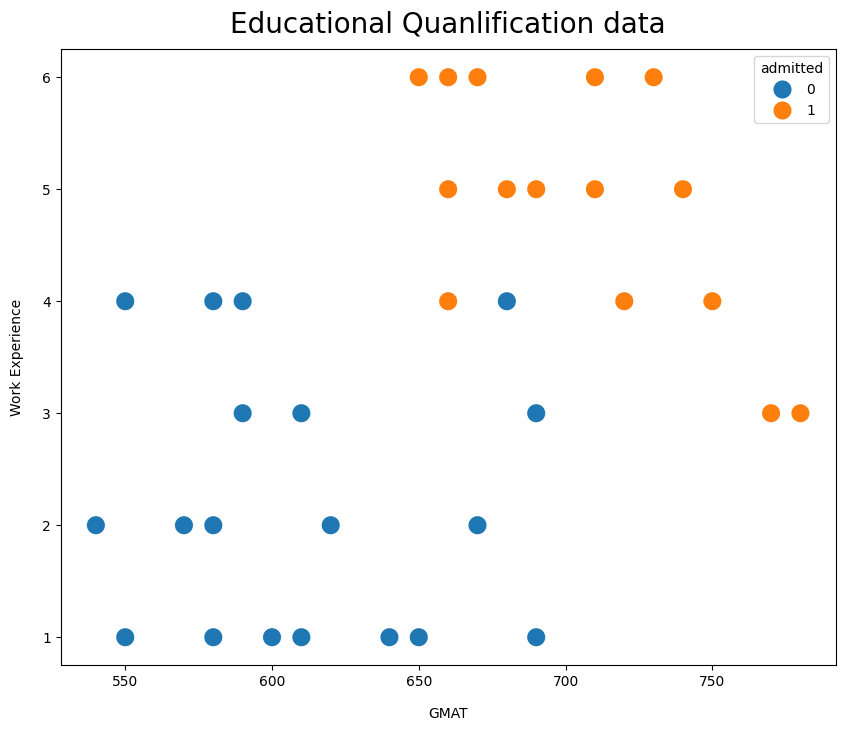

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='work_experience', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

1) High GMAT and high Work experience = > admitted 2) there is a lienar decision boundary =? good to go with LR model

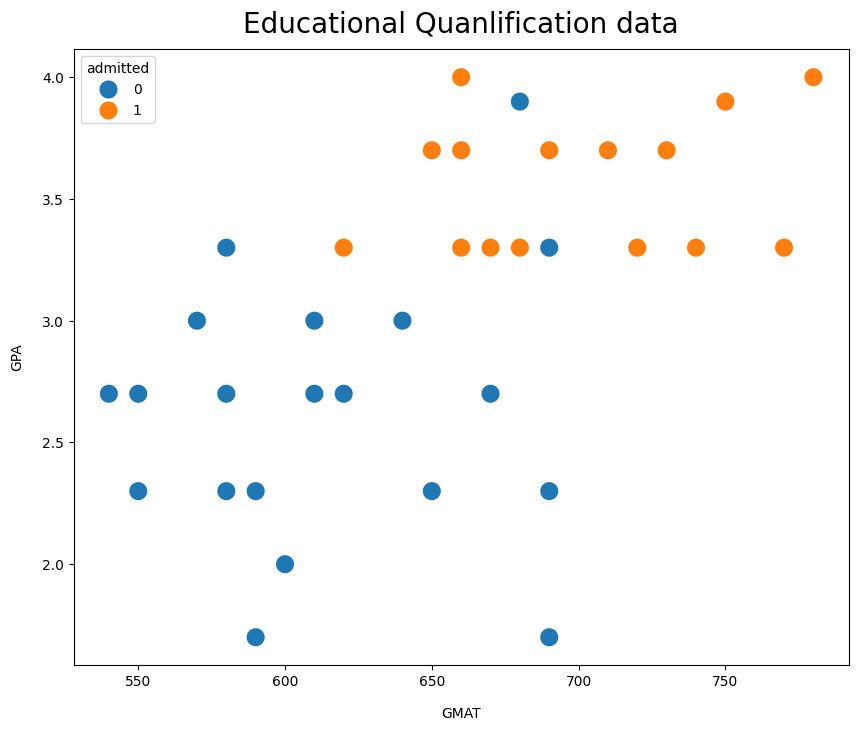

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='gpa', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("GPA", labelpad=13)
ax = plt.gca()

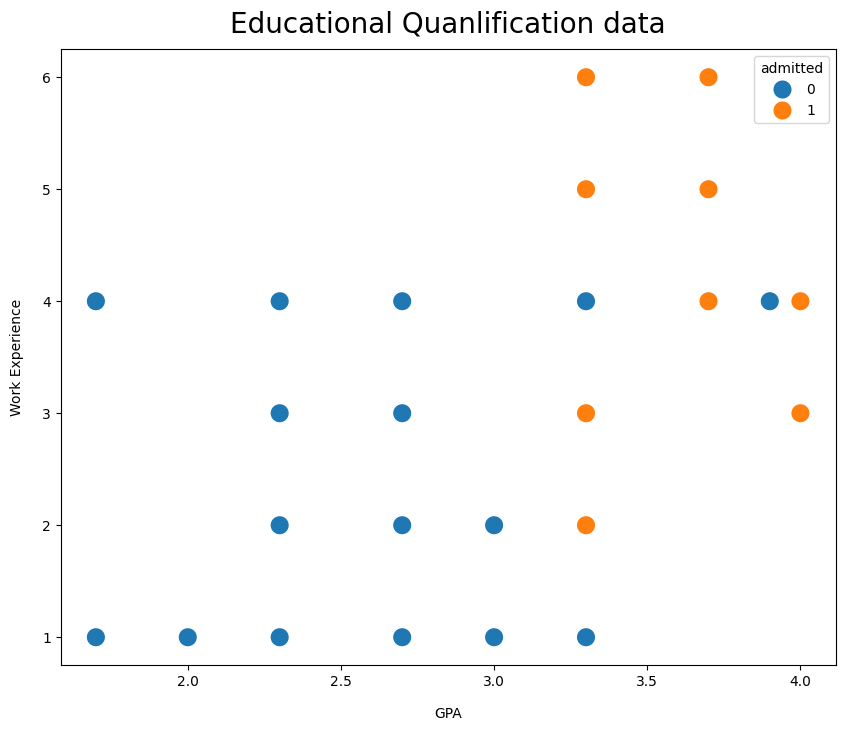

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gpa', y='work_experience', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GPA", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

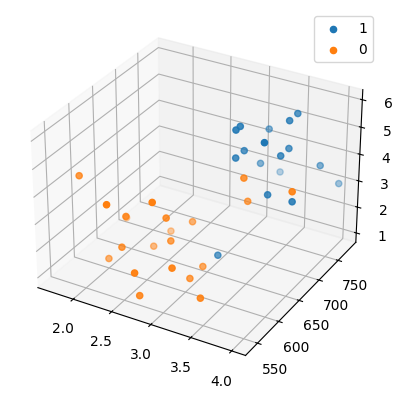

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df.admitted.unique():
    ax.scatter(df.gpa[df.admitted==s],df.gmat[df.admitted==s],df['work_experience'][df.admitted==s],label=s)

ax.legend()

1) When we look at the 3d plot, all the points in the top right are blue and all points in bottom left are orange => there is a clear linear decision boundary

2) No transfomration required

3) People with more gpa, gmat, work experience are more likely to get admitted => In line with our GK

#Data Jar

In [17]:
X = df[['gmat', 'gpa','work_experience']].values # fts
y = df['admitted'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) # train- test split

In [18]:
y_train

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1])

#Model


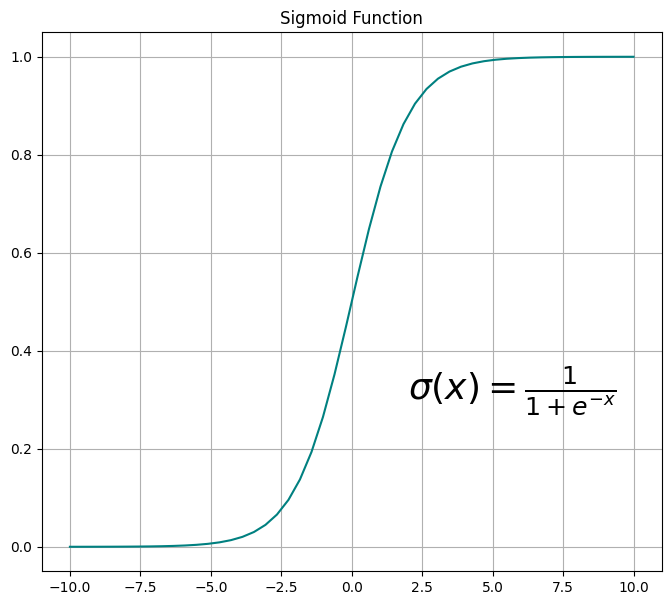

In [19]:
import numpy as np

def sigmoid(x):
  return(1/(1 + np.exp(-x)))

x_values_for_sigmoid = np.linspace(-10, 10)
plt.figure(figsize=(8, 7))
plt.plot(x_values_for_sigmoid, sigmoid(x_values_for_sigmoid), c='teal')
plt.title('Sigmoid Function')
plt.grid(True)
plt.text(2, 0.3, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=26)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)

#logistic_regression.coef_
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [21]:
logistic_regression.predict([[480, 2.5, 1]])

array([0])

In [22]:
logistic_regression.predict_proba([[760,3.8,5]])

array([[0.00582955, 0.99417045]])

In [23]:
logistic_regression.predict_proba([[755,3.8,5]])

array([[0.0071234, 0.9928766]])

In [24]:
logistic_regression.predict_proba(X_test)

array([[0.9935881 , 0.0064119 ],
       [0.99361808, 0.00638192],
       [0.9762945 , 0.0237055 ],
       [0.99808928, 0.00191072],
       [0.09230075, 0.90769925],
       [0.98890361, 0.01109639],
       [0.55070919, 0.44929081],
       [0.97782788, 0.02217212],
       [0.06641167, 0.93358833],
       [0.59546603, 0.40453397]])

In [25]:
logistic_regression.coef_

array([[0.04034928, 0.28657862, 1.27891901]])

In [26]:
logistic_regression.intercept_

array([-33.01007646])

y = 1/(1 + exp(-0.04 * gmat -0.28 * gpa - 1.27 * wexp + 33))

#Evaluation Metric


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred) # f1 score
# # logistic_regression.score(X_test,y_test)
# plot_roc_curve(logistic_regression, X_test, y_test) #AUROC
# accuracy_score(y_test,y_pred) #accuracy

0.6666666666666666